# Random Forest

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_excel('glass.xlsx')
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [4]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
# duplicates
df.duplicated().sum()

1

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# summary
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Data Visualization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

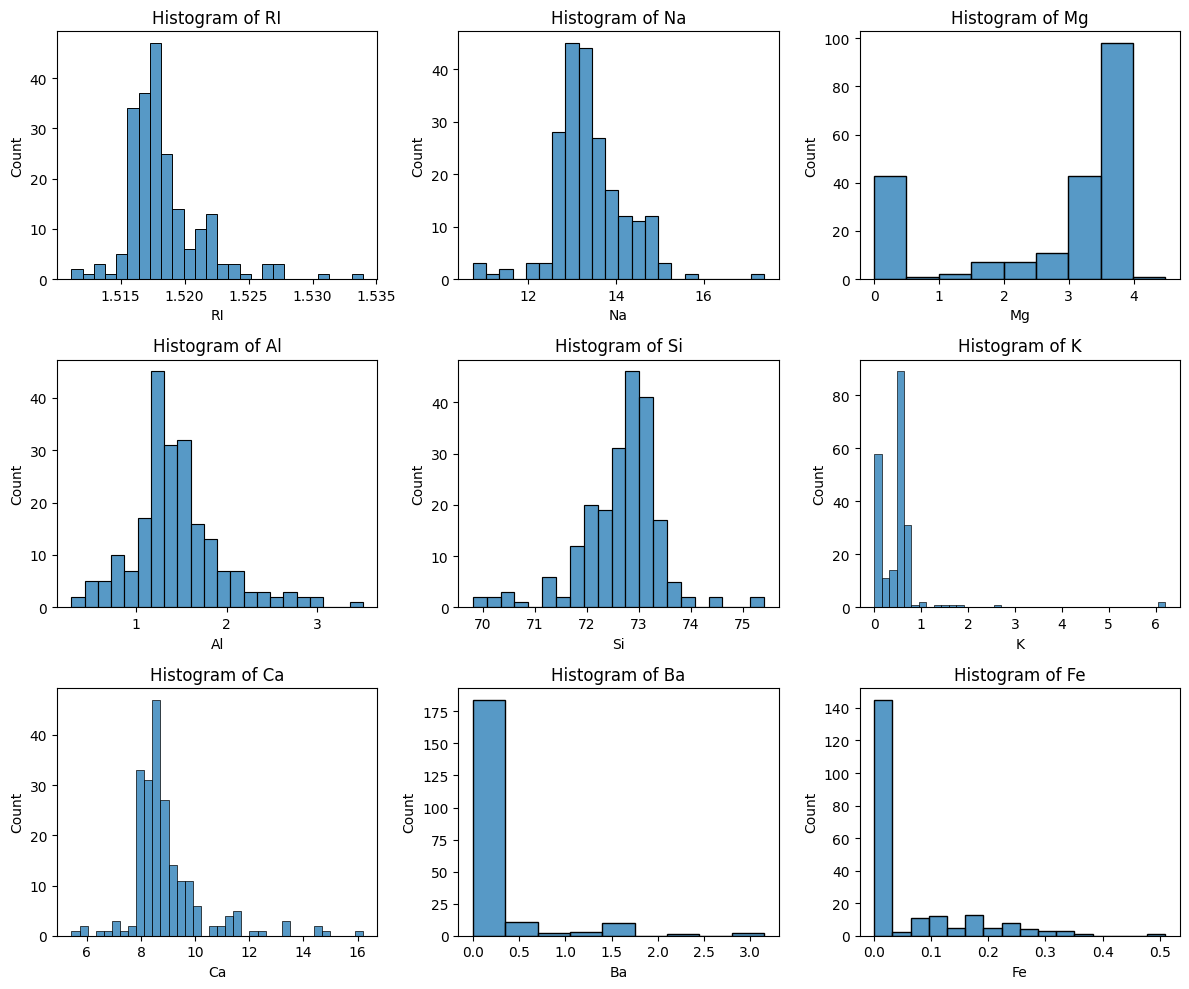

In [17]:
# histplots
fig, axes = plt.subplots(3,3,figsize=(12,10))
axes = axes.ravel()

df1 = df.drop('Type', axis=1)

for i, col in enumerate(df1.columns):
    sns.histplot(df1[col], ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt

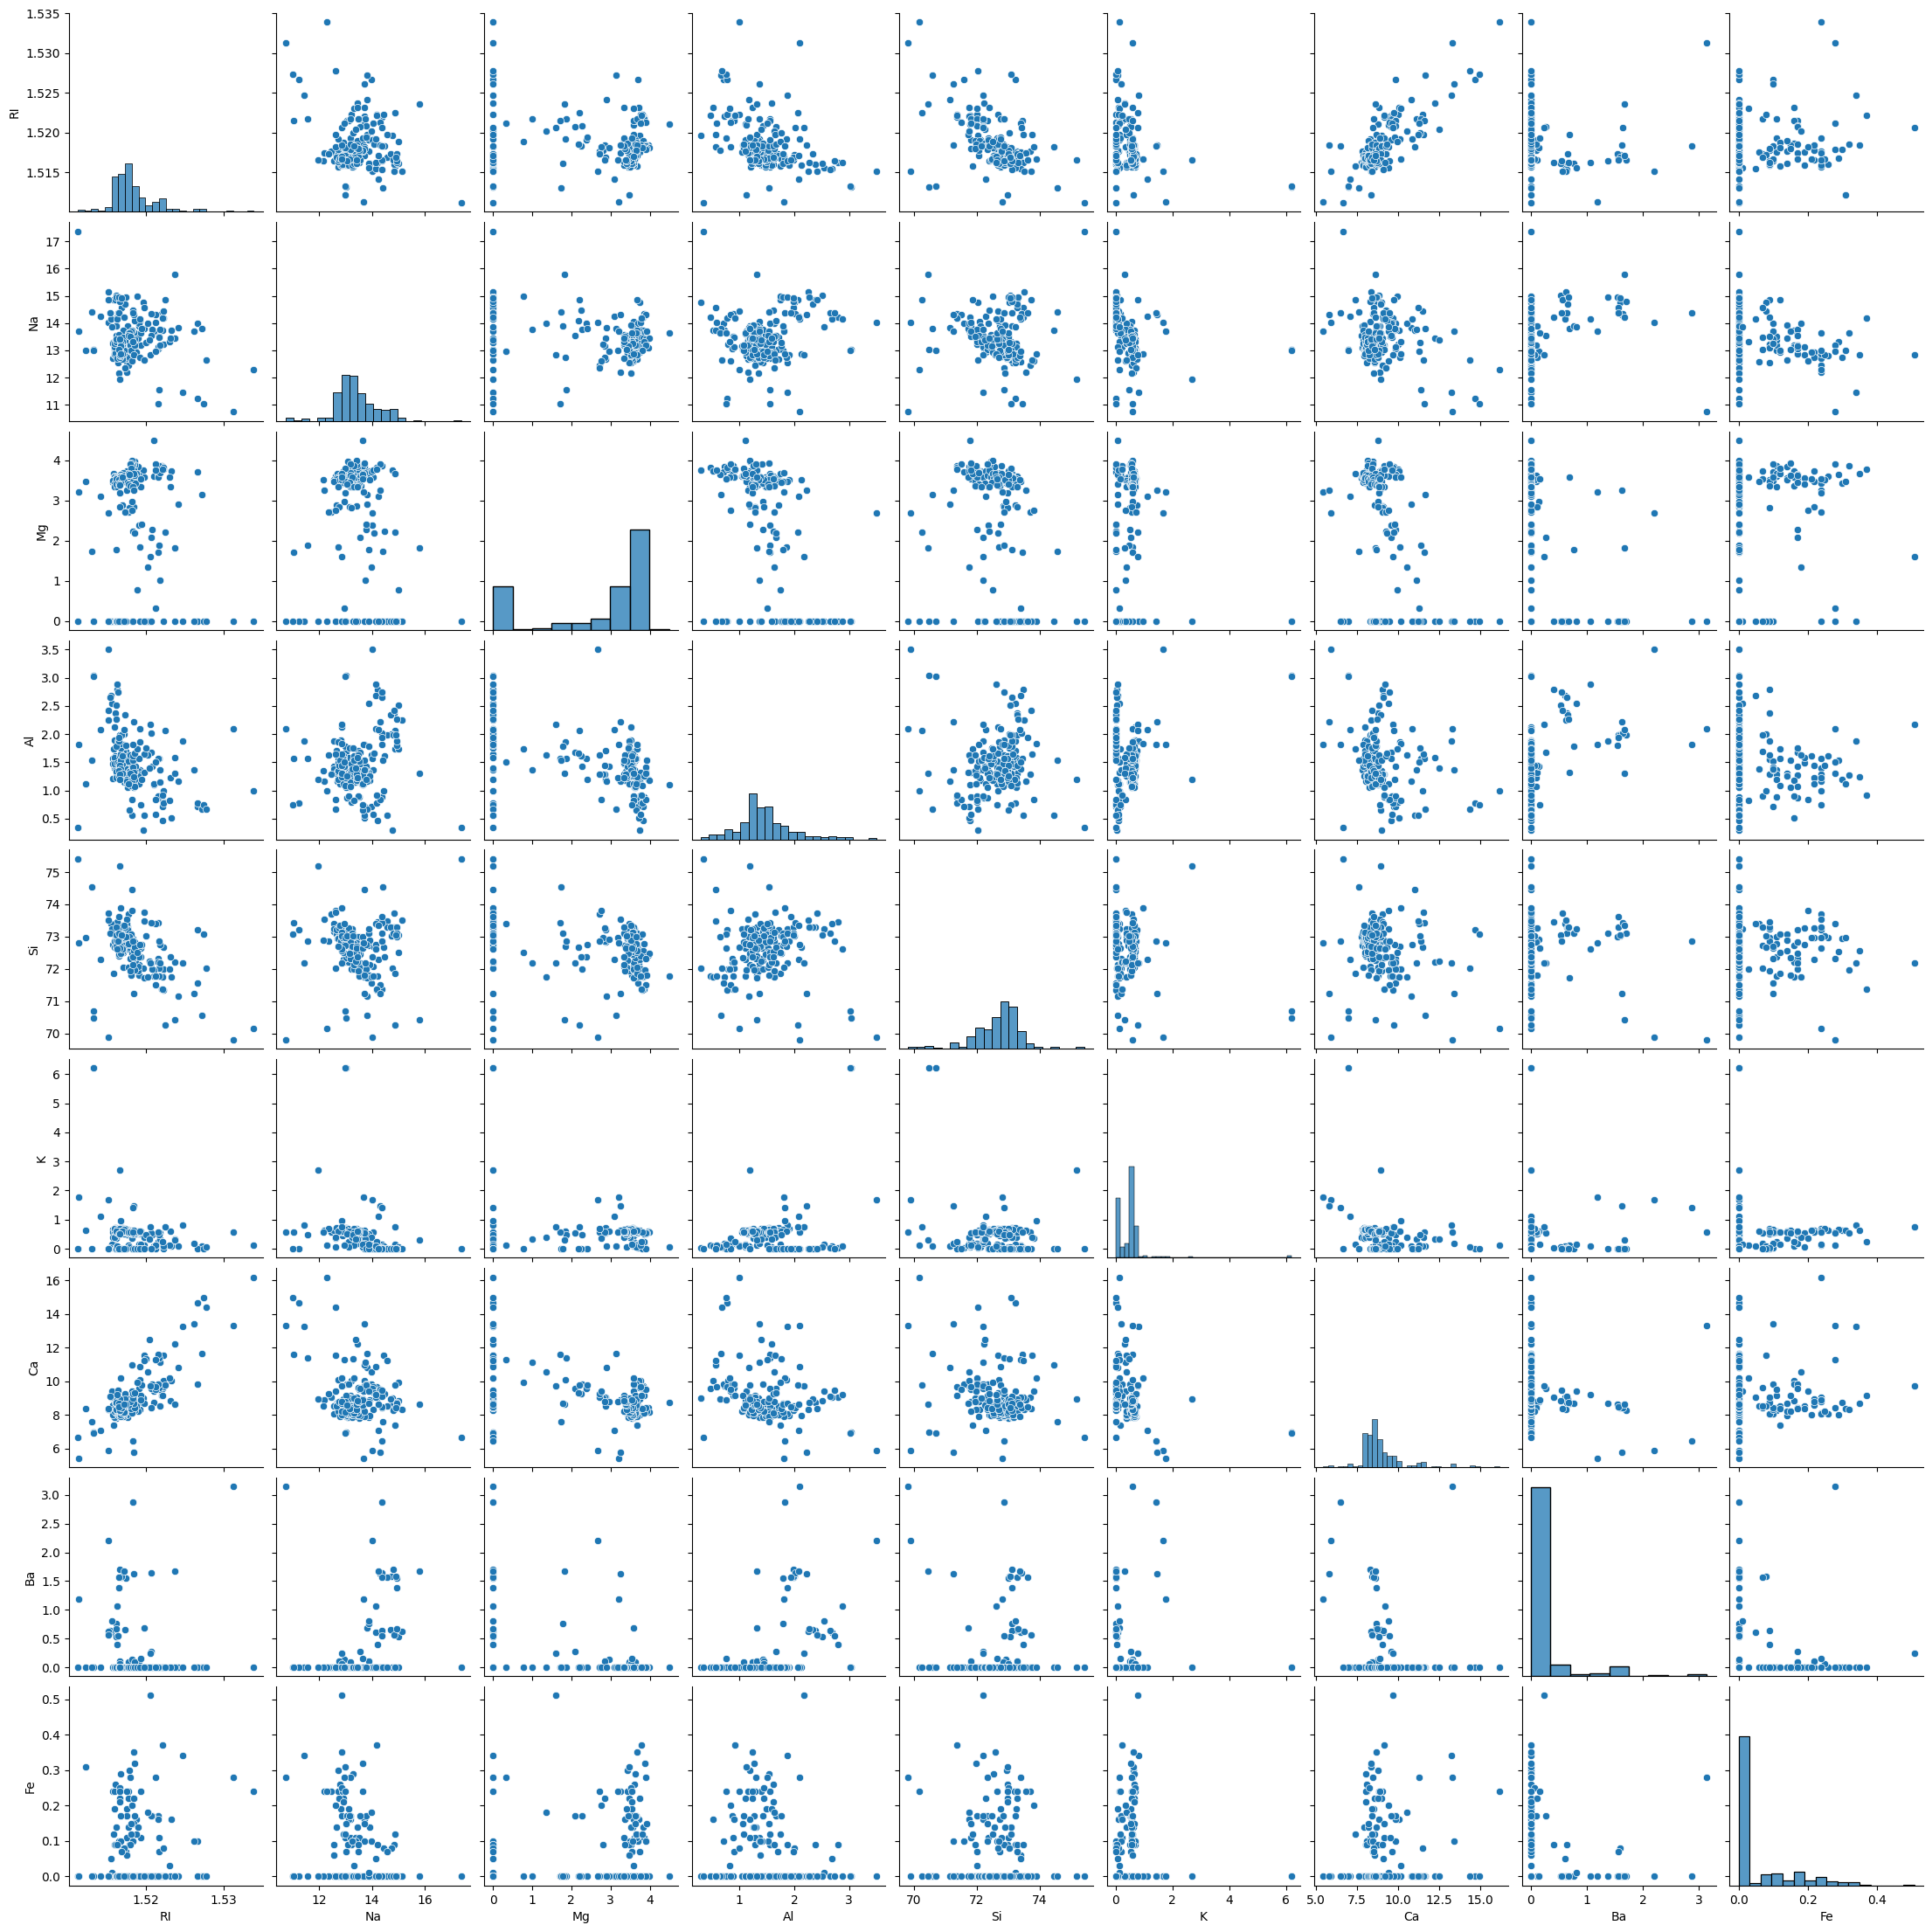

In [19]:
# pairplot
sns.pairplot(df1)

<Axes: >

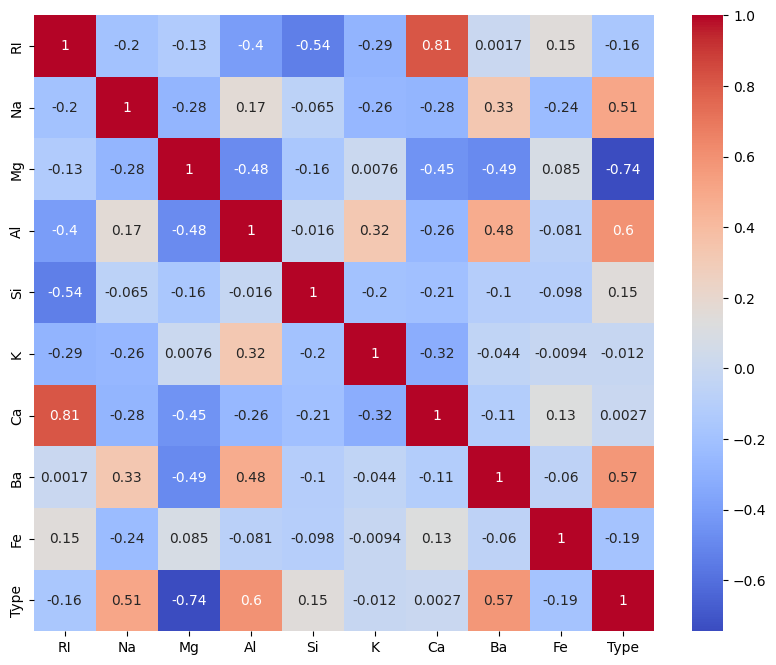

In [21]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Data Preprocessing



*   No null values.
*   No categorical variables.
*   Random Forest does not require feature scaling as preprocessing step. Still given all features in same scale, we need not to do feature scaling.

## Random Forest Model Implementation

In [25]:
# splitting data
from sklearn.model_selection import train_test_split
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [55]:
# accuracy, precision, recall & F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8604651162790697
Precision: 0.8790569895221058
Recall: 0.8604651162790697
F1 score: 0.8593363275368372


We can achieve 86% on this dataset using Random Forest Model at max_depth of 7. Other than these, We can paly with different hyperparamters.

## Bagging and Boosting Methods

In [63]:
# Random Forest itself is one of Bagging Method
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [64]:
# accuracy, precision, recall & F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7674418604651163
Precision: 0.686046511627907
Recall: 0.7674418604651163
F1 score: 0.7157162593815876


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We got an accuracy of 76.74% with adaboost classifier.

**1. Explain Bagging and Boosting methods. How is it different from each other?**

Bagging & Boosting are ensemble techniques used to improve the performance and robustness of machine learning models.


*   Bagging is combination of homogeneous weak learning models in parallel manner.
*   Whereas, Boosting is combination of homogeneous weak learning models in sequential pattern.



**2. Explain how to handle imbalance in the data.**

We can handle imbalance in the data by applying ensemble techniques, as we repeat the process n number of times with different samples and different features.